In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data_files = glob.glob("Tell1CalibCsv/*.csv")

In [3]:
def module_names():
    names = []
    data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    names = data[1]
    return names

print(type(module_names()))

<class 'pandas.core.series.Series'>


In [4]:
def join_pedestal_data():
    joined_data = pd.DataFrame()
    for file in data_files:
        data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
        data = data[data[0].str.contains("pedestal")]
        joined_data = pd.concat([joined_data, data.loc[:, 2:2049]], axis=1)
        #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
    joined_data.index = module_names()
    joined_data.columns = range(90112)
    return joined_data

joined_pedestal_data_by_module = join_pedestal_data()
#print(joined_pedestal_data_by_module)

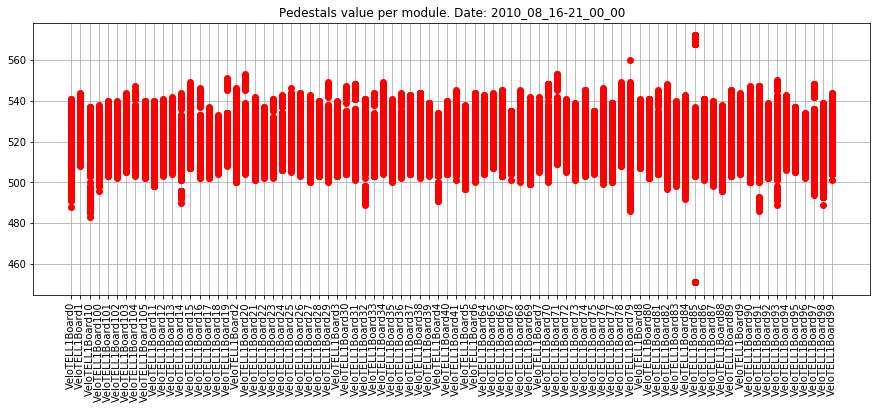

In [6]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

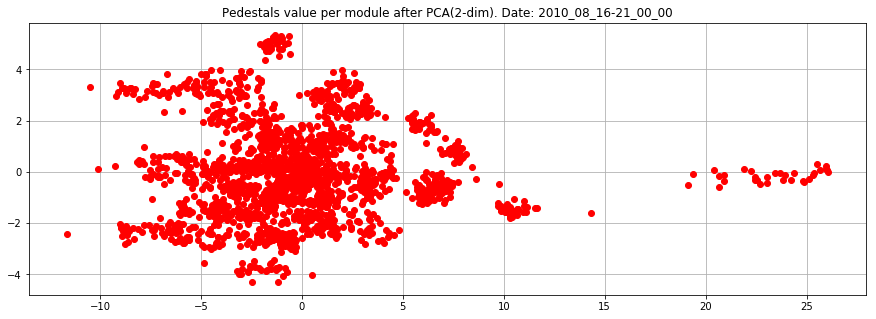

In [7]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

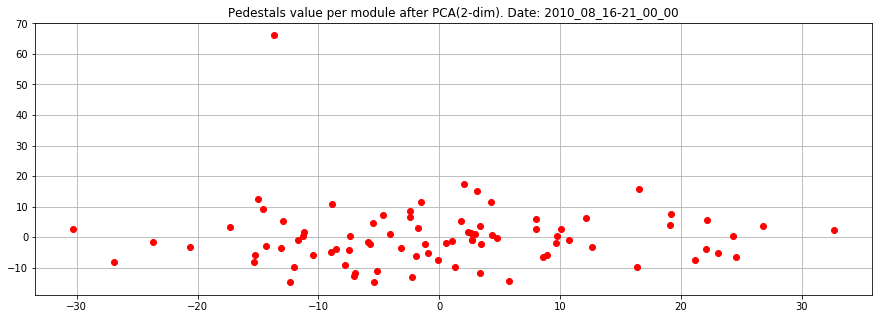

In [8]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

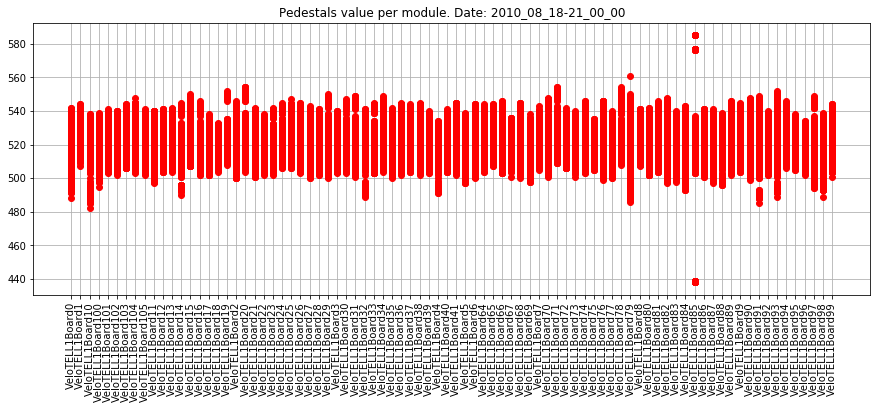

In [9]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[1] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module. Date: 2010_08_18-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'ro')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

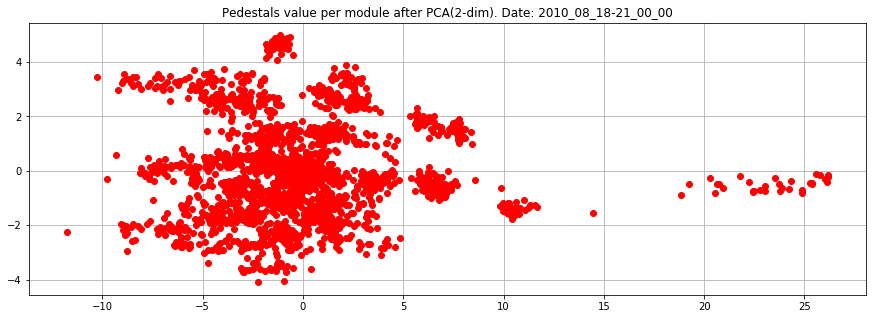

In [10]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

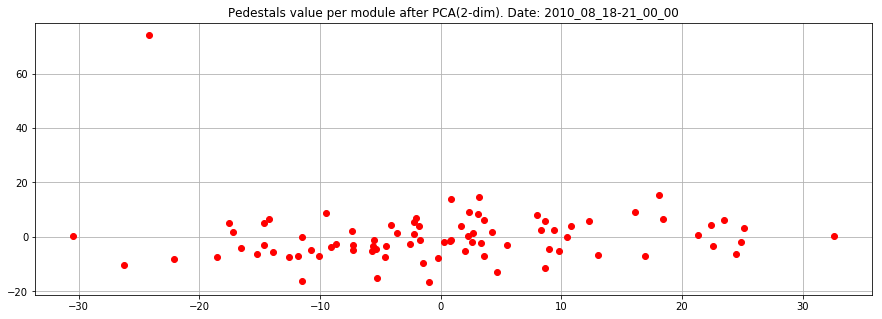

In [11]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

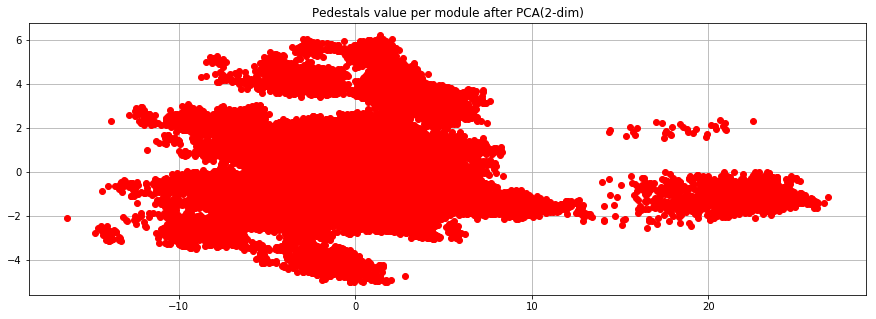

In [12]:
data_PCA = joined_pedestal_data_by_module.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

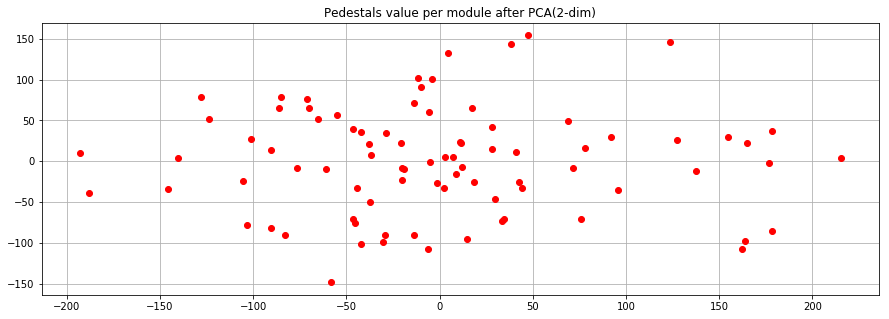

In [13]:
data_PCA = joined_pedestal_data_by_module

x = data_PCA.loc[:, range(90112)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

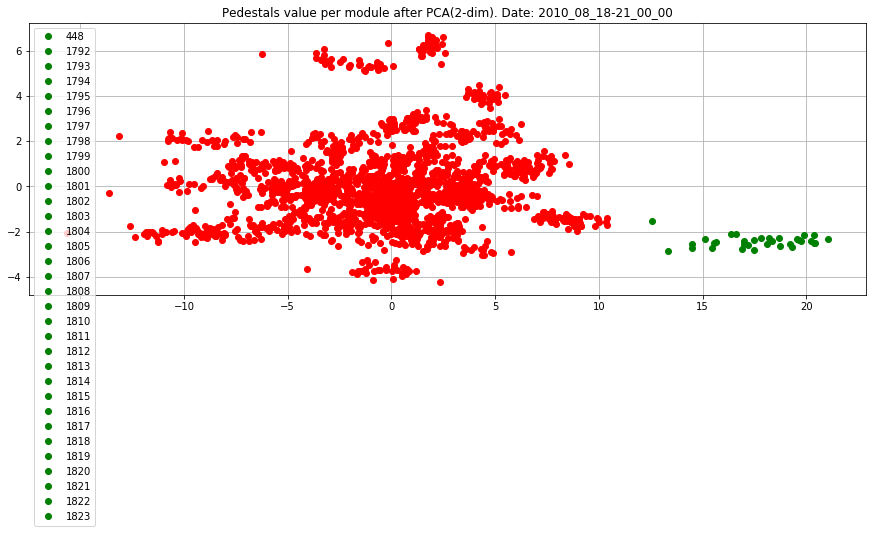

In [14]:
data2 = pd.DataFrame()
data = pd.read_csv(data_files[2] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("pedestal")]
data2 = data.loc[:, 2:2049]

data2.index = module_names()
data2.columns = range(2048)

data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Pedestals value per module after PCA(2-dim). Date: 2010_08_18-21_00_00')

for i in principalDf.index:
    if principalDf['pc1'][i] > 12:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go', label=i)
    else:
        ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
ax.legend()
plt.show()


Tell1CalibCsv\2010_08_16-21_00_00.csv
Tell1CalibCsv\2010_08_18-21_00_00.csv
Tell1CalibCsv\2011_03_07-20_00_00.csv
Tell1CalibCsv\2011_05_01-12_46_00.csv
Tell1CalibCsv\2011_06_18-19_00_00.csv
Tell1CalibCsv\2011_07_26-15_00_00.csv
Tell1CalibCsv\2011_09_09-17_30_00.csv
Tell1CalibCsv\2012_04_06-17_30_00.csv
Tell1CalibCsv\2012_04_27-09_00_00.csv
Tell1CalibCsv\2012_05_04-01_30_00.csv
Tell1CalibCsv\2012_06_27-18_00_00.csv
Tell1CalibCsv\2012_07_06-20_00_00.csv
Tell1CalibCsv\2012_07_30-20_00_00.csv
Tell1CalibCsv\2012_08_01-21_00_00.csv
Tell1CalibCsv\2012_08_02-17_00_00.csv
Tell1CalibCsv\2012_08_14-22_00_00.csv
Tell1CalibCsv\2012_09_23-20_00_00.csv
Tell1CalibCsv\2013_01_30-16_00_00.csv
Tell1CalibCsv\2015_07_02-17_00_00.csv
Tell1CalibCsv\2015_09_05-20_00_00.csv
Tell1CalibCsv\2015_11_14-19_00_00.csv
Tell1CalibCsv\2015_11_23-21_00_00.csv
Tell1CalibCsv\2016_05_19-22_00_00.csv
Tell1CalibCsv\2016_05_31-16_34_12.csv
Tell1CalibCsv\2016_06_15-16_32_13.csv
Tell1CalibCsv\2016_11_07-18_00_00.csv
Tell1CalibCs

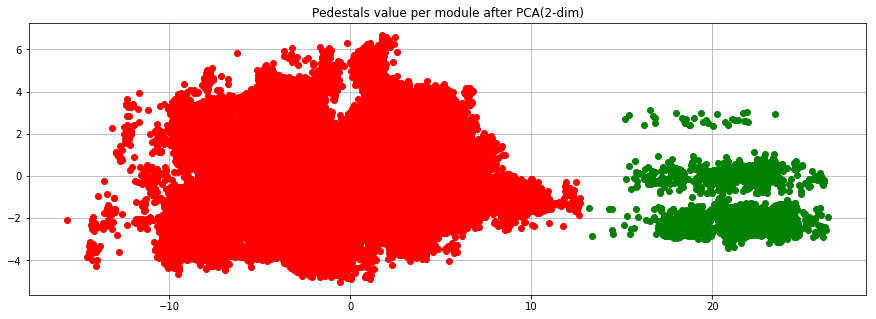

[448, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 448, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 448, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 448, 1792, 1793, 1794, 1

In [15]:
fig, ax = plt.subplots()
sensor_numbers = []
for file in data_files:
    print(file)
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_PCA = data2.T

    x = data_PCA.loc[:, module_names()].values
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    #print(principalDf)

    ax.set_title('Pedestals value per module after PCA(2-dim)')

    for i in principalDf.index:
        if principalDf['pc1'][i] > 13:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'go')
            sensor_numbers.append(i)
        else:
            ax.plot(principalDf['pc1'][i], principalDf['pc2'][i], 'ro')
    
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()
print(sensor_numbers)

In [18]:
print([[x,sensor_numbers.count(x)] for x in set(sensor_numbers)])

[[1792, 44], [1793, 44], [1794, 44], [1795, 44], [1796, 44], [1797, 44], [1798, 44], [1799, 44], [1800, 44], [1801, 44], [1802, 44], [1803, 44], [1804, 44], [1805, 44], [1806, 44], [1807, 44], [1808, 44], [1809, 44], [1810, 44], [1811, 44], [1812, 44], [1813, 44], [1814, 44], [1815, 44], [1816, 44], [1817, 44], [1818, 44], [1819, 44], [1820, 44], [1821, 44], [1822, 44], [1823, 44], [448, 4]]


In [29]:
data_filesT = glob.glob("Tell1CalibCsvT/*.csv")

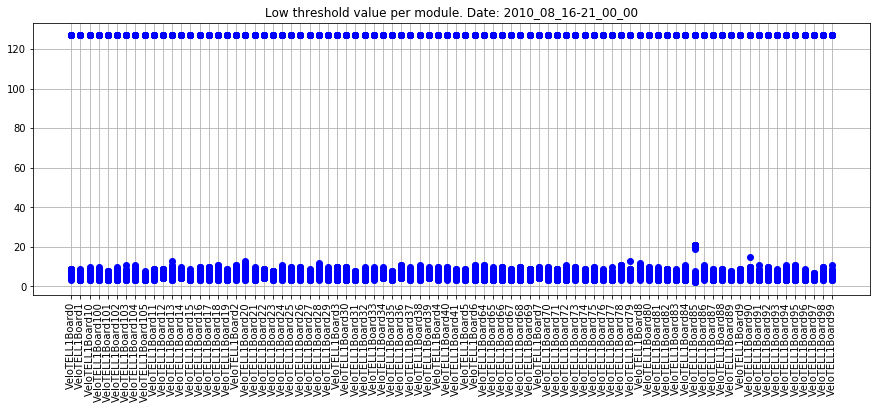

In [35]:
data2 = pd.DataFrame()
data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("low_threshold")]
data2 = data.loc[:, 2:2306]

data2.index = module_names()
data2.columns = range(2304)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'bo')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

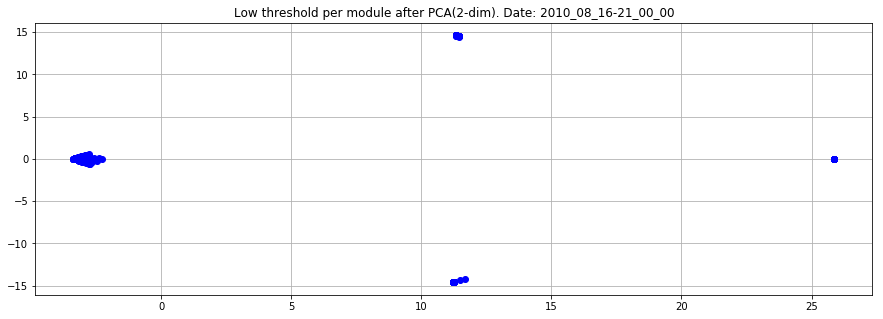

In [36]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

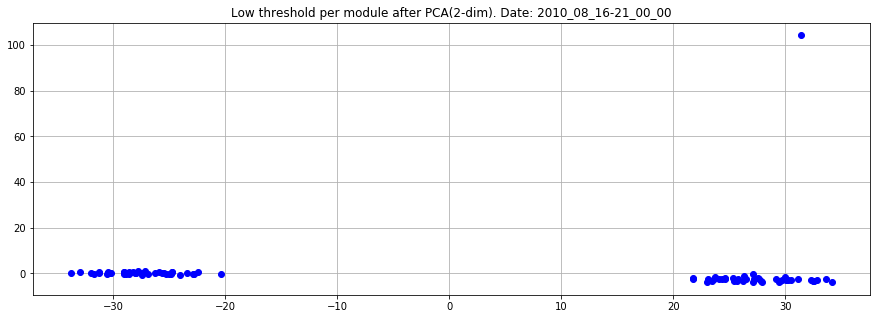

In [37]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [43]:
j_d = pd.DataFrame()
for file in data_filesT:
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("low_threshold")]
    j_d = pd.concat([j_d, data.loc[:, 2:2306]], axis=1)
    #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
j_d.index = module_names()
j_d.columns = range(101376)


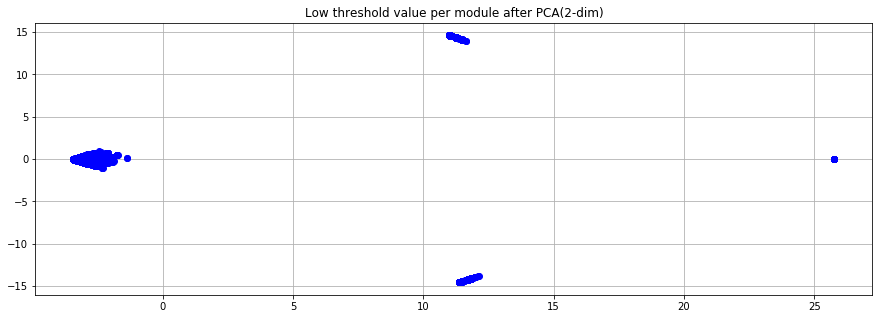

In [47]:
data_PCA = j_d.T
x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

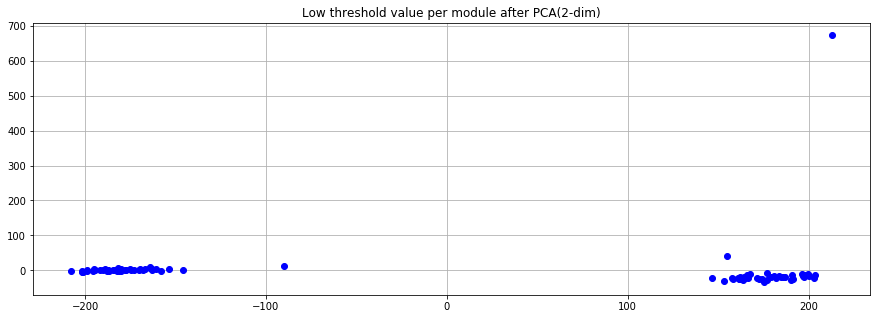

In [49]:
data_PCA = j_d

x = data_PCA.loc[:, range(101376)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'bo')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

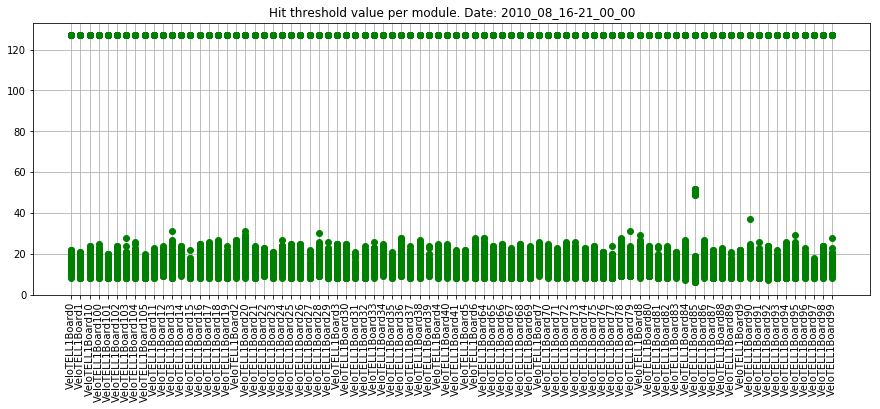

In [51]:
data2 = pd.DataFrame()
data = pd.read_csv(data_filesT[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
data = data[data[0].str.contains("hit_threshold")]
data2 = data.loc[:, 2:2306]

data2.index = module_names()
data2.columns = range(2304)

fig, ax = plt.subplots()
ax.set_title('Hit threshold value per module. Date: 2010_08_16-21_00_00')
    
for i in range(len(data2.columns)):
    ax.plot(data2.index, data2[i], 'go')
    
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

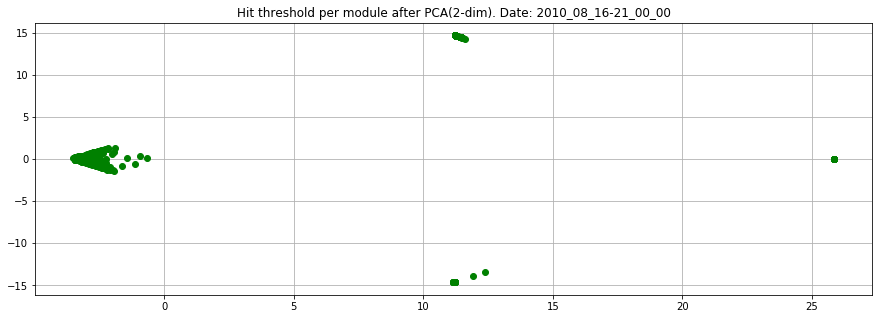

In [53]:
data_PCA = data2.T

x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

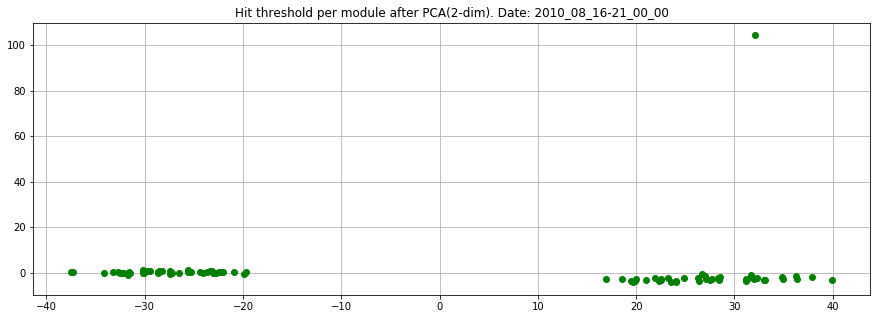

In [54]:
data_PCA = data2

x = data_PCA.loc[:, range(2048)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold per module after PCA(2-dim). Date: 2010_08_16-21_00_00')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [55]:
j_d = pd.DataFrame()
for file in data_filesT:
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("hit_threshold")]
    j_d = pd.concat([j_d, data.loc[:, 2:2306]], axis=1)
    #joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
j_d.index = module_names()
j_d.columns = range(101376)

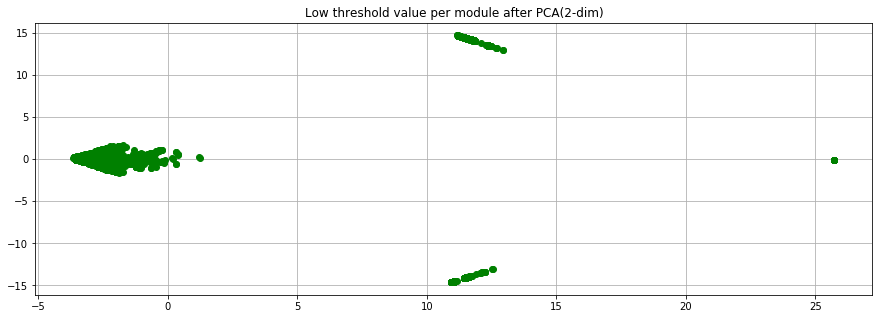

In [57]:
data_PCA = j_d.T
x = data_PCA.loc[:, module_names()].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Low threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

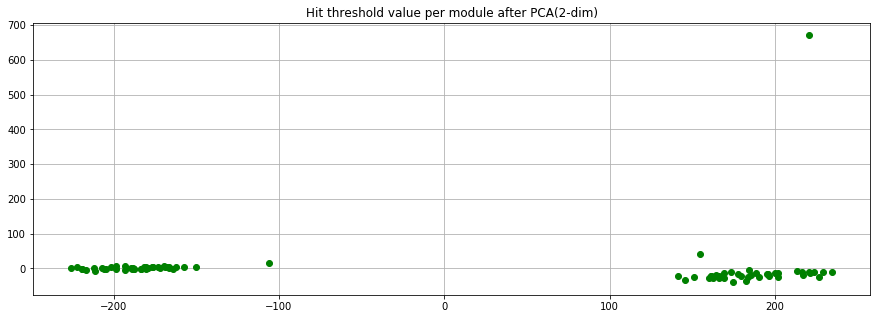

In [58]:
data_PCA = j_d

x = data_PCA.loc[:, range(101376)].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

fig, ax = plt.subplots()
ax.set_title('Hit threshold value per module after PCA(2-dim)')
    
ax.plot(principalDf['principal component 1'], principalDf['principal component 2'], 'go')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()